**Prepare the environment**

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

**Pandas read a local csv**

In [3]:
df = pd.read_csv("~/Desktop/student_grades.csv")

**Exercise 1a)**
Extract information from the results of `.describe` and compute IQR and range of each exam and the final grade.

In [7]:
df1=df.describe()
IQR=df1.loc['75%',['exam1','exam2','exam3']]-df1.loc['25%',['exam1','exam2','exam3']]
Range=df1.loc['max',['exam1','exam2','exam3']]-df1.loc['min',['exam1','exam2','exam3']]
print(IQR)
print(Range)

exam1    22.0
exam2    19.0
exam3    16.0
dtype: float64
exam1    43.0
exam2    28.0
exam3    26.0
dtype: float64


**Sklearn:split into test/train**

In [25]:
# test_train_split
X = df.drop(['final_grade','student_id'], axis=1)
#pass it a list
print(X.head())

y = df[['final_grade']]
print(y.head())

   exam1  exam2  exam3
0    100     90     95
1     98     93     96
2     85     83     87
3     83     80     86
4     93     90     96
   final_grade
0           96
1           95
2           87
3           85
4           97


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

In [27]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['exam1', 'exam2', 'exam3', 'final_grade']
Train dimensions (rows, columns): (83, 4)


In [28]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['exam1', 'exam2', 'exam3', 'final_grade']
Test dimensions (rows, columns): (21, 4)


**Exercise 1b)**
Write a for loop to plot each of the 3 features(exam 1,2,&3) with the final grade using a joint plot. What can you say about each relationship(using pearson's r and the p-value.)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


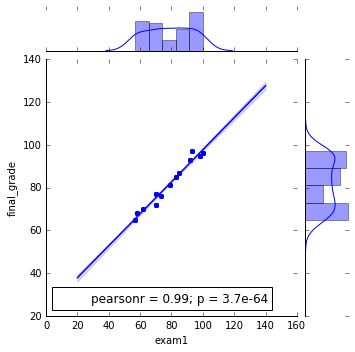

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


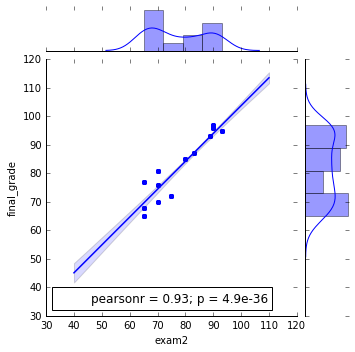

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


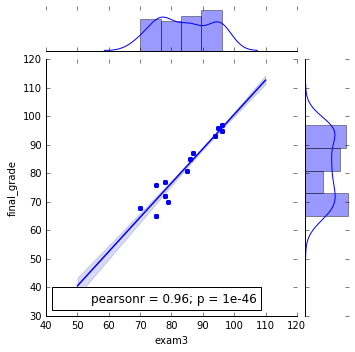

In [31]:
#plt.figure(figsize=(16, 10))
#with sns.axes_style('white'):

for i, col in enumerate(['exam1', 'exam2', 'exam3']):
    j = sns.jointplot(col, "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
    plt.show()

In [32]:
#Each graph has an r value close to 1 which shows correlation to target variable.

**Exercise 1c)**
Plot the boxplot and heatmap sid eby side using 'subplot'

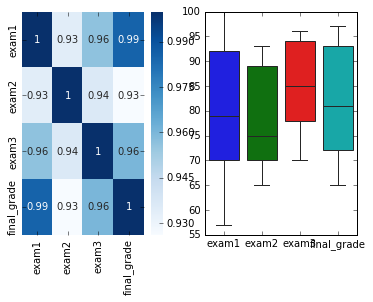

In [35]:
plt.subplot(1, 2, 1)
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.drop(columns=['student_id']))
plt.show()

**Exercise 1d)**
What are the take-aways from the evaluation of `lm1` and `lm2`?

They both seem to predict the grades well but we havent looked at the metrics for the test set.

**Exercise 1e)**
Fit,predict,and evaluate one more model,`lm3`,using exam 3 only.

In [52]:
lm3=LinearRegression()

In [54]:
lm3.fit(X_train[['exam3']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
lm3_y_intercept = lm3.intercept_
print(lm2_y_intercept)

lm3_coefficients = lm3.coef_
print(lm2_coefficients)

[12.79518052]
[[0.59709165 0.26106586]]


In [66]:
print('Univariate - final_exam = b + m1*exam3')
print('    y-intercept  (b): %.2f' % lm3_y_intercept)
print('    coefficient (m1): %.2f' % lm3_coefficients[0][0])

Univariate - final_exam = b + m1*exam3
    y-intercept  (b): -19.63
    coefficient (m1): 1.20


In [56]:
y_pred_lm3=lm3.predict(X_train[['exam3']])

In [67]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm1)
print("lm3\n  mse: {:.3}".format(mse_lm3)) 

lm3
  mse: 3.37


In [70]:
r2_lm3 = r2_score(y_train, y_pred_lm3)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the third exam.'.format(r2_lm3))

  92.24% of the variance in the students final grade can be explained by the grade on the third exam.


**Exercise 1f)**
How does the results of the model compare to the other two? Which should you use,based on these results?

Based on having the highest r2 metric and the lowest MSE lm2 seems like the best fit.

**Exercise 1g)**
Predict final grades of the out-of-sample data(test dataframe)and evaluate results.

In [72]:
y_pred_test_lm3=lm3.predict(X_test[['exam3']])

In [73]:
mse_lm3_test = mean_squared_error(y_test, y_pred_test_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3_test)) 

lm3
  mse: 12.1


In [74]:
r2_lm3_test = r2_score(y_test, y_pred_test_lm3)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm3_test))

  90.07% of the variance in the students final grade can be explained by the grade on the first exam.


**Exercise 1h)**
Which model performs the best, based on the 2 out-of sample evaluation results(the example one,`lm1`,and the exercise one ,`lm3`,from the above exercise).

Based on the mse(3.42 vs. 12.1) and r2(.972 vs. .9007) `lm2` performs better than `lm3` on out of sample predictions.